In [1]:
# Load the database and show some data

import pandas as pd

# Load Data
Data = pd.read_csv('Auto Sales data.csv')

# Show Data info
print(Data.head())

   QUANTITYORDERED  PRICEEACH    SALES   ORDERDATE COUNTRY DEALSIZE
0             30.0      95.70  2871.00  24/02/2018     USA    Small
1             34.0      81.35  2765.90    7/5/2018  France    Small
2             41.0      94.74  3884.34    1/7/2018  France   Medium
3             45.0      83.26  3746.70  25/08/2018     USA   Medium
4             36.0      96.66  3479.76  28/10/2018     NaN   Medium


In [2]:
# Show Data info
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2735 non-null   float64
 1   PRICEEACH        2690 non-null   float64
 2   SALES            2702 non-null   float64
 3   ORDERDATE        2690 non-null   object 
 4   COUNTRY          2686 non-null   object 
 5   DEALSIZE         2723 non-null   object 
dtypes: float64(3), object(3)
memory usage: 128.9+ KB
None


In [5]:
# Drop any rows with missing values
Data.dropna(inplace=True)

# Convert ORDERDATE column to datetime with specified format
Data['ORDERDATE'] = pd.to_datetime(Data['ORDERDATE'], format='%d/%m/%Y', errors='coerce')

# Drop rows with invalid dates (if any remain)
Data.dropna(subset=["ORDERDATE"], inplace=True)

# Remove all duplicates
Data.drop_duplicates(inplace = True)

# Display DataFrame information
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2492 entries, 0 to 2746
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2492 non-null   float64       
 1   PRICEEACH        2492 non-null   float64       
 2   SALES            2492 non-null   float64       
 3   ORDERDATE        2492 non-null   datetime64[ns]
 4   COUNTRY          2492 non-null   object        
 5   DEALSIZE         2492 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 136.3+ KB
None


In [6]:
# The relationship between the columns
print(Data.corr(numeric_only=True))

                 QUANTITYORDERED  PRICEEACH     SALES
QUANTITYORDERED         1.000000   0.018692  0.558082
PRICEEACH               0.018692   1.000000  0.810039
SALES                   0.558082   0.810039  1.000000


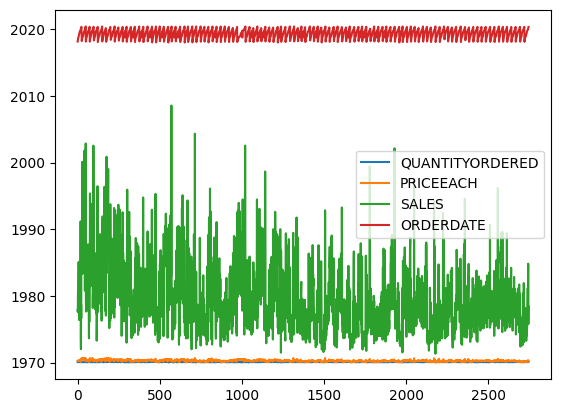

In [7]:
# visualize DataFrame using matplotlib
import matplotlib.pyplot as plt

Data.plot()
plt.show()

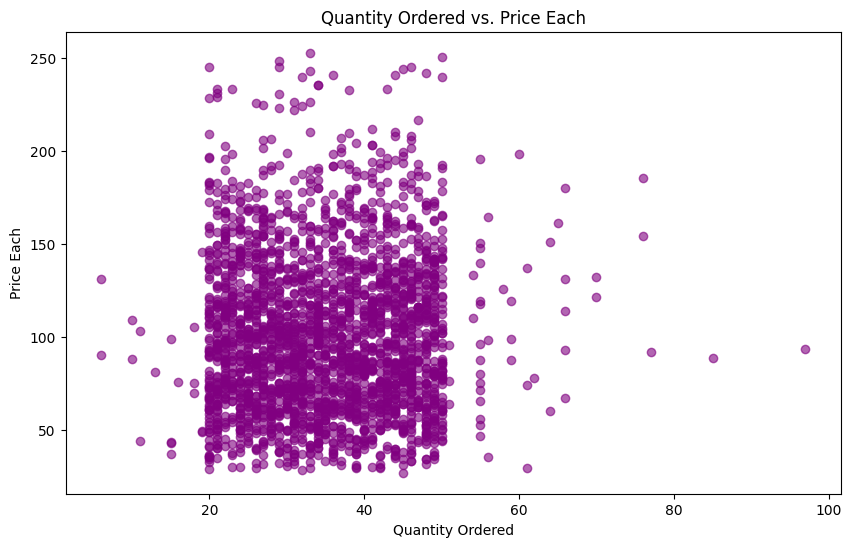

In [18]:
# Using scatter plot show relation between QUANTITYORDERED and PRICEEACH

plt.figure(figsize=(10, 6))
plt.scatter(Data['QUANTITYORDERED'], Data['PRICEEACH'], alpha=0.6, color='purple')

plt.title('Quantity Ordered vs. Price Each')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')

plt.show()

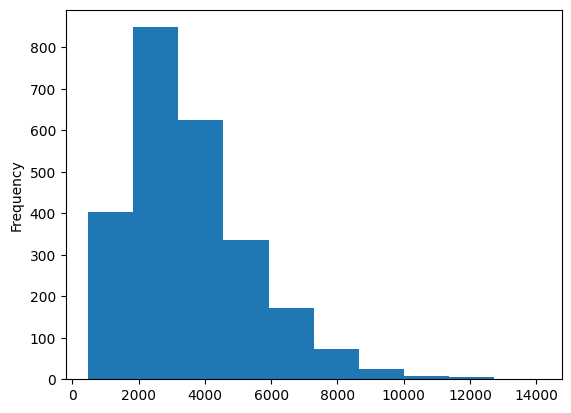

In [11]:
# Histogram
Data["SALES"].plot(kind = 'hist')
plt.show()

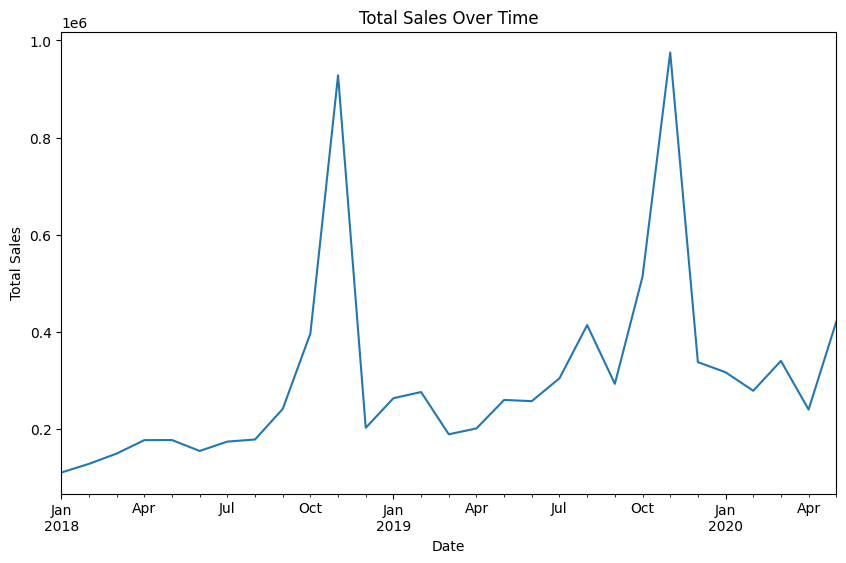

In [15]:
# Plot sales over time
plt.figure(figsize=(10, 6))
Data.groupby(Data['ORDERDATE'].dt.to_period("M"))['SALES'].sum().plot(kind='line')

plt.title('Total Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')

plt.show()

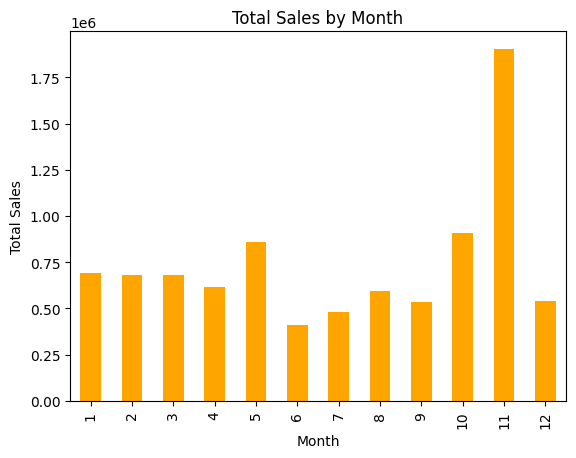

In [19]:
# Sales by Month
Data['Month'] = Data['ORDERDATE'].dt.month
Data.groupby('Month')['SALES'].sum().plot(kind='bar', color='orange')

plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()